In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Constants import *
from XPR import *

## Polarisation of transmitted beam

In [2]:
E0 = 8.04798e3 * e
deltaE = 1.1 * e # FWHM
#deltaE = E0 * 0.5e-4 # FWHM
step = 0.001 * e
t = 0.5e-3
theta = np.linspace(37.55,37.75, 1000)
Tsigma = [bandwidth_avg_Tsigma(E0, deltaE, step, t, theta_val) for theta_val in theta]
Tpi = [bandwidth_avg_Tpi(E0, deltaE, step, t, theta_val) for theta_val in theta]
xi = [np.abs(Tsigma[i]/Tpi[i]) for i in range(len(Tsigma))]

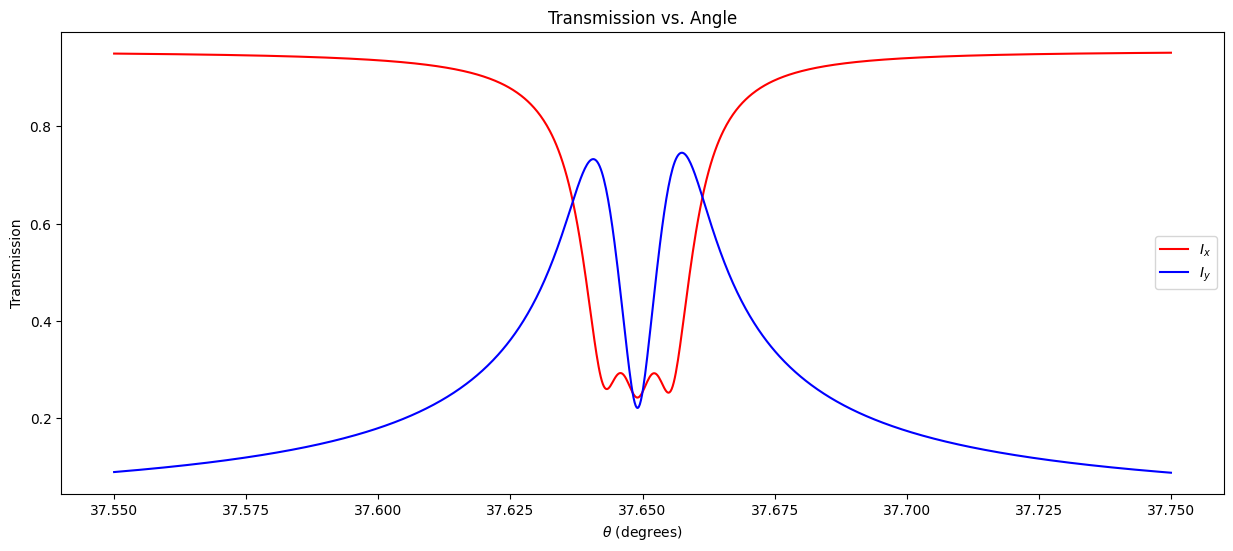

In [3]:
### Plot Ix and Iy ###

plt.figure(figsize=(15, 6))
plt.plot(theta, [np.abs(1/np.sqrt(2)*(Tsigma[i]+Tpi[i])) for i in range(len(Tsigma))], label=r'$I_x$', color='red')
plt.plot(theta, [np.abs(1/np.sqrt(2)*(Tsigma[i]-Tpi[i])) for i in range(len(Tsigma))], label=r'$I_y$', color='blue')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('Transmission')
plt.title('Transmission vs. Angle')
plt.legend()
plt.show()

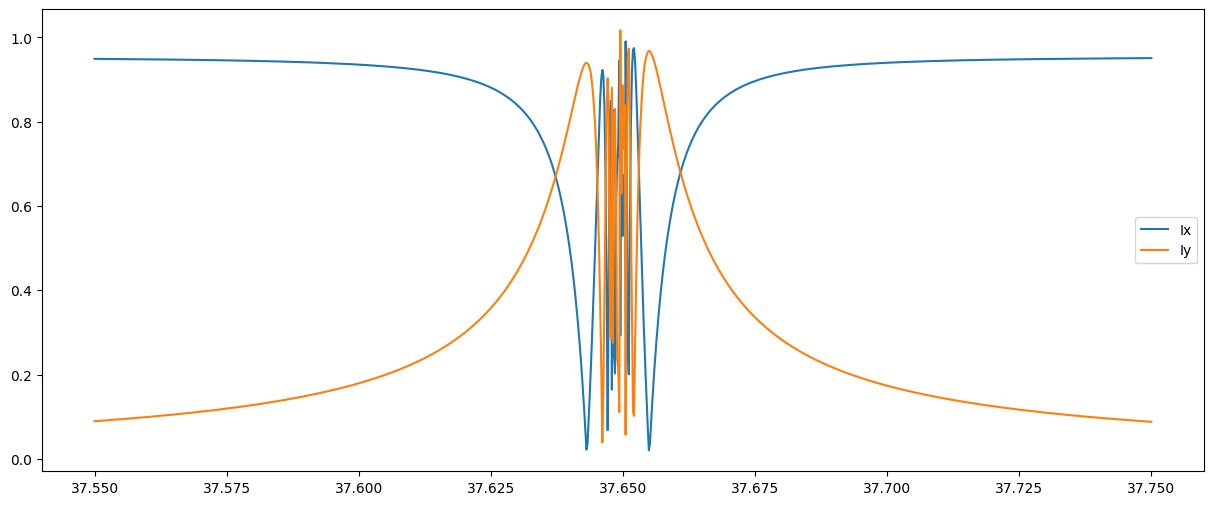

In [4]:
Tsigma_arr = calculate_sigma(E0, t, theta)[-1]
Tpi_arr = calculate_pi(E0, t, theta)[-1]

plt.figure(figsize=(15, 6))
plt.plot(theta, 1/np.sqrt(2)*(np.abs(Tsigma_arr+Tpi_arr)),label="Ix")
plt.plot(theta, 1/np.sqrt(2)*(np.abs(Tsigma_arr-Tpi_arr)),label="Iy")
plt.legend()
plt.show()

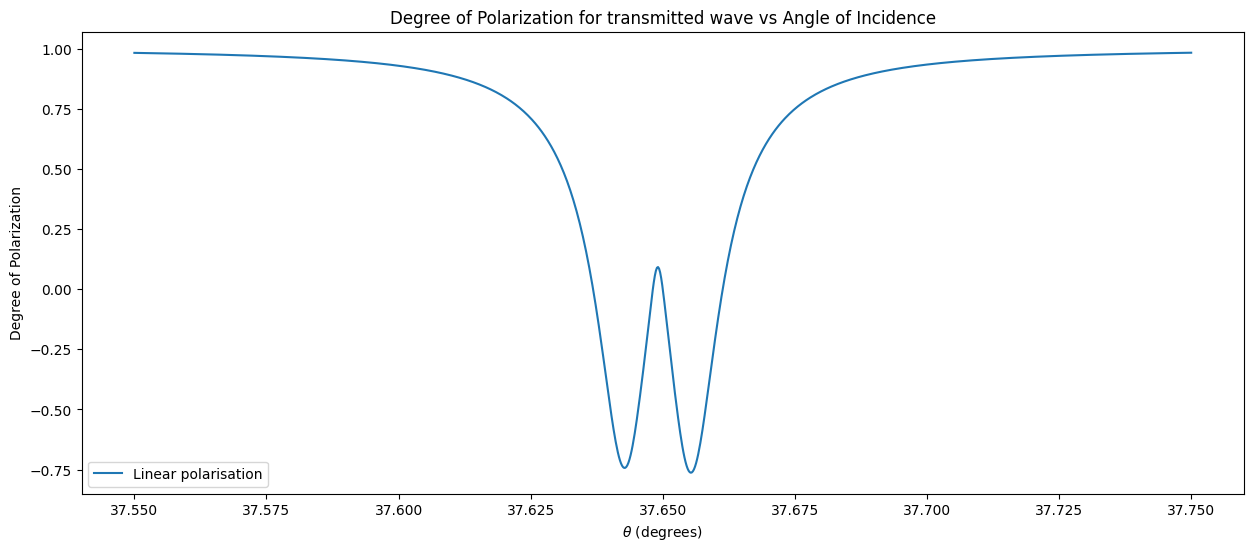

In [5]:
plt.figure(figsize=(15, 6), dpi=100)
plt.plot(theta, [(np.abs(Tsigma[i]+Tpi[i])**2 - np.abs(Tsigma[i]-Tpi[i])**2) / 
                 (np.abs(Tsigma[i]+Tpi[i])**2 + np.abs(Tsigma[i]-Tpi[i])**2) for i in range(len(Tsigma))],
                 label = "Linear polarisation")
#plt.plot(theta, 2*np.imag(Tsigma * np.conj(Tpi))/
#                (np.abs(Tsigma)**2 + np.abs(Tpi)**2), 
#                label = "Circular polarisation")

#plt.plot(theta, [np.sin(np.angle(Tsigma[i])-np.angle(Tpi[i])) for i in range(len(Tsigma))],
#         label = "Circular polarisation")
#plt.plot(theta, [4*xi[i]*np.cos(np.angle(Tsigma[i])-np.angle(Tpi[i])) / (2+2*xi[i]**2) for i in range(len(Tsigma))])

plt.legend()
plt.xlabel(r"$\theta$ (degrees)")
plt.ylabel("Degree of Polarization")
plt.title("Degree of Polarization for transmitted wave vs Angle of Incidence")
plt.show()

## Polarisation of diffracted beam

In [6]:
theta = np.linspace(37.55,37.75, 1000)
Dsigma = [bandwidth_avg_Dsigma(E0, deltaE, step, t, theta_val) for theta_val in theta]
Dpi = [bandwidth_avg_Dpi(E0, deltaE, step, t, theta_val) for theta_val in theta]
xi = [np.abs(Dsigma[i]/Dpi[i]) for i in range(len(Dsigma))]

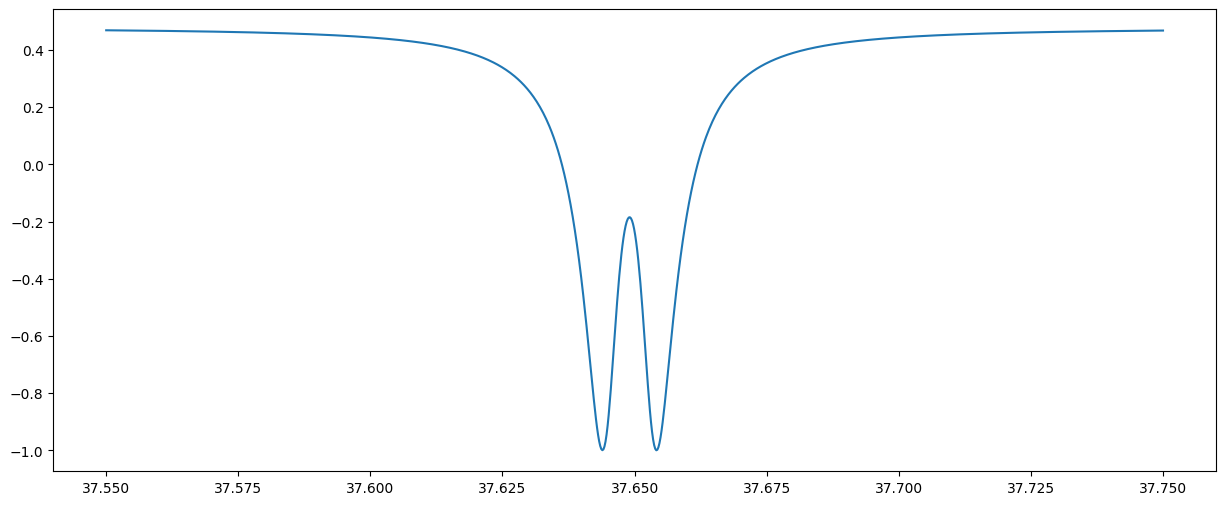

In [7]:
plt.figure(figsize=(15, 6), dpi=100)
plt.plot(theta, [(np.abs(Dsigma[i]+Dpi[i])**2 - np.abs(Dsigma[i]-Dpi[i])**2) / 
                 (np.abs(Dsigma[i]+Dpi[i])**2 + np.abs(Dsigma[i]-Dpi[i])**2) for i in range(len(Dsigma))])
plt.show()

## Checking u, v and delta

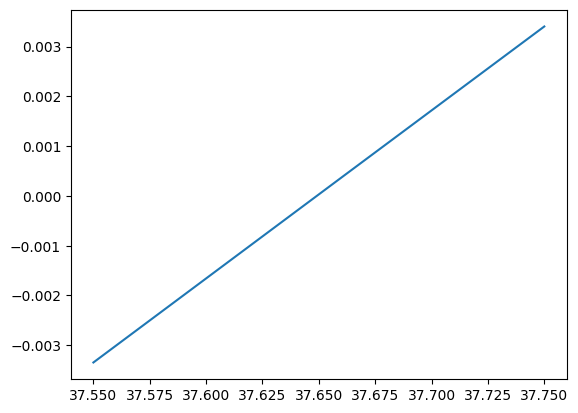

In [8]:
### Alpha ###

plt.plot(theta, calculate_pi(E0, t, theta)[0])
plt.show()

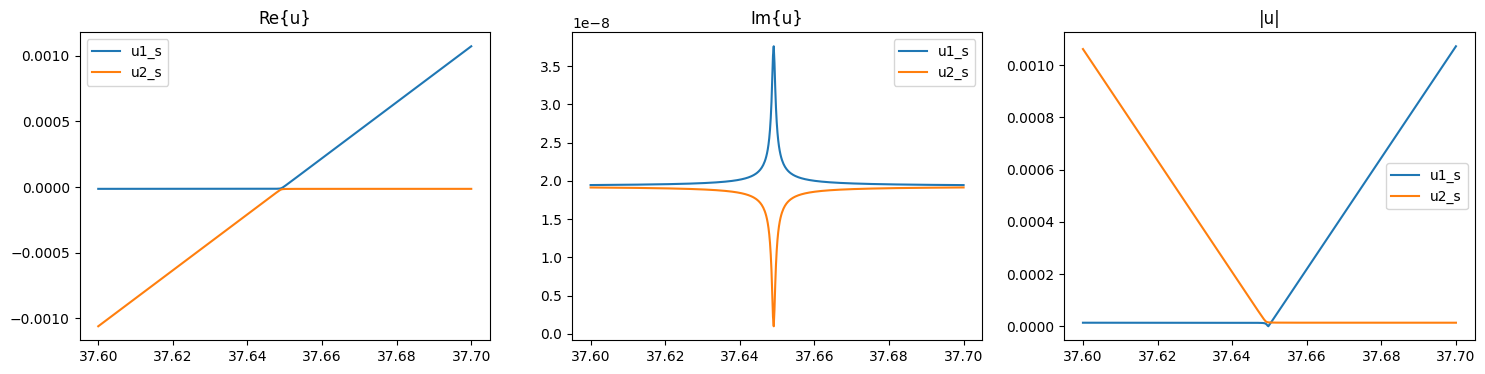

In [9]:
### u ###

theta = np.linspace(37.60,37.70, 500)

fig, axs = plt.subplots(1,3, figsize=(18,4))
axs[0].plot(theta,calculate_sigma(E0, t, theta)[1].real,label="u1_s")
axs[0].plot(theta,calculate_sigma(E0, t, theta)[2].real,label="u2_s")
#axs[0].plot(theta,calculate_pi(E0, t, theta)[1].real,label="u1_p")
#axs[0].plot(theta,calculate_pi(E0, t, theta)[2].real,label="u2_p")
axs[0].set_title("Re{u}")
axs[0].legend()

axs[1].plot(theta,calculate_sigma(E0, t, theta)[1].imag,label="u1_s")
axs[1].plot(theta,calculate_sigma(E0, t, theta)[2].imag,label="u2_s")
#axs[1].plot(theta,calculate_pi(E0, t, theta)[1].imag,label="u1_p")
#axs[1].plot(theta,calculate_pi(E0, t, theta)[2].imag,label="u2_p")
axs[1].set_title("Im{u}")
axs[1].legend()

axs[2].plot(theta,np.abs(calculate_sigma(E0, t, theta)[1]),label="u1_s")
axs[2].plot(theta,np.abs(calculate_sigma(E0, t, theta)[2]),label="u2_s")
#axs[2].plot(theta,np.abs(calculate_pi(E0, t, theta)[1]),label="u1_p")
#axs[2].plot(theta,np.abs(calculate_pi(E0, t, theta)[2]),label="u2_p")
axs[2].set_title("|u|")
axs[2].legend()

plt.show()

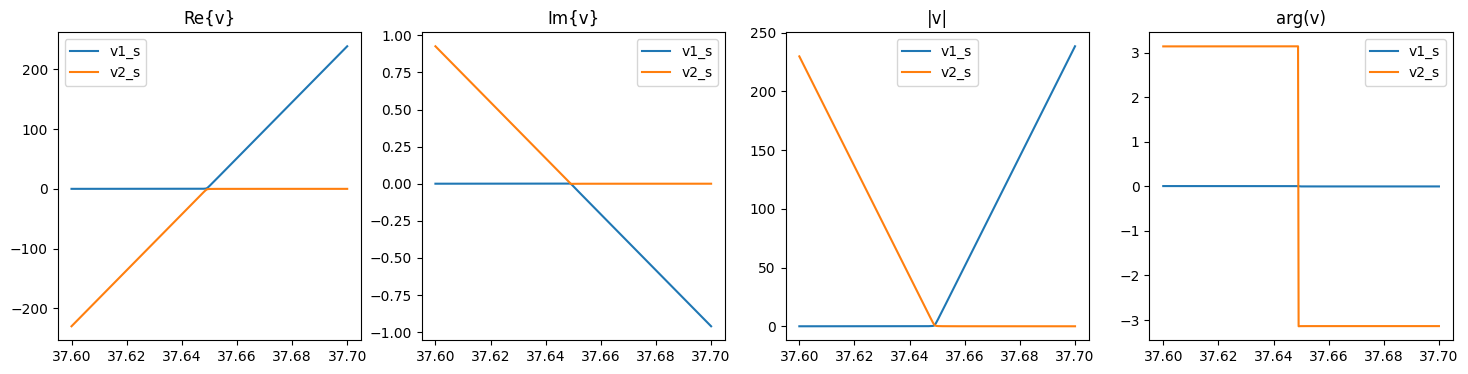

In [10]:
### v ###

theta = np.linspace(37.60,37.70, 500)

fig, axs = plt.subplots(1,4, figsize=(18,4))
axs[0].plot(theta,calculate_sigma(E0, t, theta)[3].real,label="v1_s")
axs[0].plot(theta,calculate_sigma(E0, t, theta)[4].real,label="v2_s")
#axs[0].plot(theta,calculate_pi(E0, t, theta)[3].real,label="v1_p")
#axs[0].plot(theta,calculate_pi(E0, t, theta)[4].real,label="v2_p")
axs[0].set_title("Re{v}")
axs[0].legend()

axs[1].plot(theta,calculate_sigma(E0, t, theta)[3].imag,label="v1_s")
axs[1].plot(theta,calculate_sigma(E0, t, theta)[4].imag,label="v2_s")
#axs[1].plot(theta,calculate_pi(E0, t, theta)[3].imag,label="v1_p")
#axs[1].plot(theta,calculate_pi(E0, t, theta)[4].imag,label="v2_p")
axs[1].set_title("Im{v}")
axs[1].legend()

axs[2].plot(theta,np.abs(calculate_sigma(E0, t, theta)[3]),label="v1_s")
axs[2].plot(theta,np.abs(calculate_sigma(E0, t, theta)[4]),label="v2_s")
#axs[2].plot(theta,np.abs(calculate_pi(E0, t, theta)[3]),label="v1_p")
#axs[2].plot(theta,np.abs(calculate_pi(E0, t, theta)[4]),label="v2_p")
axs[2].set_title("|v|")
axs[2].legend()

axs[3].plot(theta,np.angle(calculate_sigma(E0, t, theta)[3]),label="v1_s")
axs[3].plot(theta,np.angle(calculate_sigma(E0, t, theta)[4]),label="v2_s")
#axs[3].plot(theta,np.abs(calculate_pi(E0, t, theta)[3]),label="v1_p")
#axs[3].plot(theta,np.abs(calculate_pi(E0, t, theta)[4]),label="v2_p")
axs[3].set_title("arg(v)")
axs[3].legend()

plt.show()

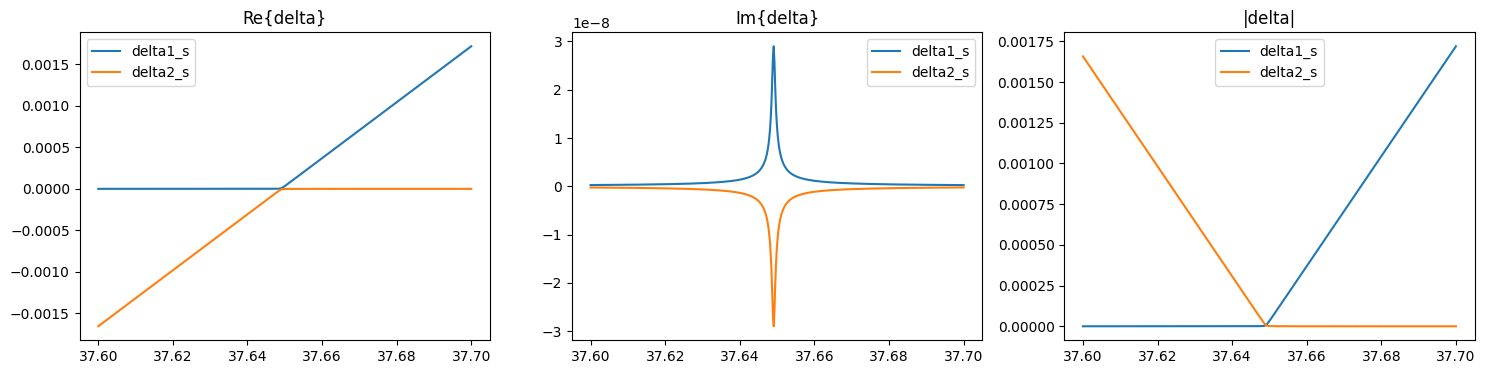

In [11]:
### delta ###

theta = np.linspace(37.60,37.70, 500)

fig, axs = plt.subplots(1,3, figsize=(18,4))
axs[0].plot(theta,calculate_sigma(E0, t, theta)[5].real,label="delta1_s")
axs[0].plot(theta,calculate_sigma(E0, t, theta)[6].real,label="delta2_s")
#axs[0].plot(theta,calculate_pi(E0, t, theta)[5].real,label="delta1_p")
#axs[0].plot(theta,calculate_pi(E0, t, theta)[6].real,label="delta2_p")
axs[0].set_title("Re{delta}")
axs[0].legend()

axs[1].plot(theta,calculate_sigma(E0, t, theta)[5].imag,label="delta1_s")
axs[1].plot(theta,calculate_sigma(E0, t, theta)[6].imag,label="delta2_s")
#axs[1].plot(theta,calculate_pi(E0, t, theta)[5].imag,label="delta1_p")
#axs[1].plot(theta,calculate_pi(E0, t, theta)[6].imag,label="delta2_p")
axs[1].set_title("Im{delta}")
axs[1].legend()

axs[2].plot(theta,np.abs(calculate_sigma(E0, t, theta)[5]),label="delta1_s")
axs[2].plot(theta,np.abs(calculate_sigma(E0, t, theta)[6]),label="delta2_s")
#axs[2].plot(theta,np.abs(calculate_pi(E0, t, theta)[5]),label="delta1_p")
#axs[2].plot(theta,np.abs(calculate_pi(E0, t, theta)[6]),label="delta2_p")
axs[2].set_title("|delta|")
axs[2].legend()

plt.show()

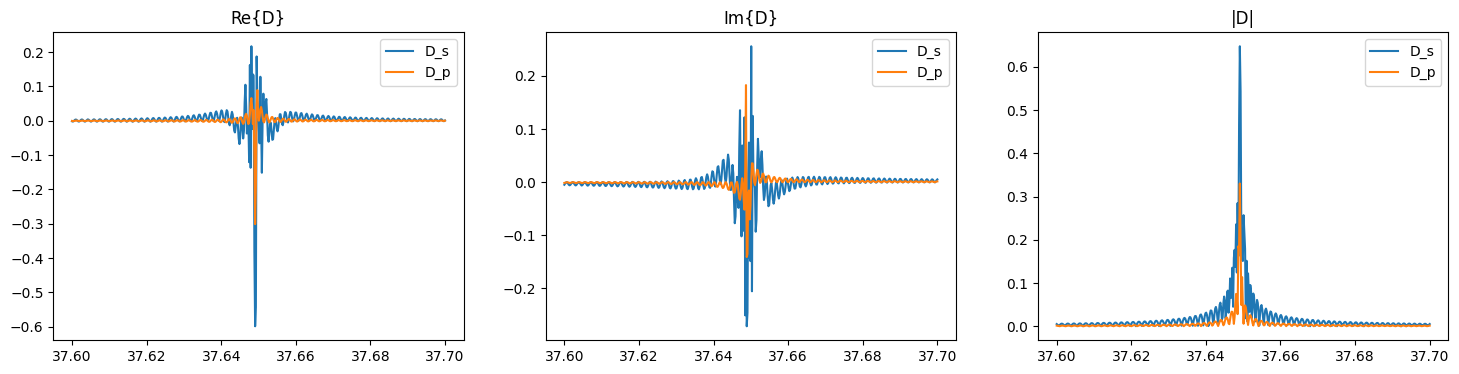

In [12]:
### D ###

theta = np.linspace(37.60,37.70, 500)


fig, axs = plt.subplots(1,3, figsize=(18,4))
axs[0].plot(theta,calculate_sigma(E0, t, theta)[7].real,label="D_s")
axs[0].plot(theta,calculate_pi(E0, t, theta)[7].real,label="D_p")
axs[0].set_title("Re{D}")
axs[0].legend()

axs[1].plot(theta,calculate_sigma(E0, t, theta)[7].imag,label="D_s")
axs[1].plot(theta,calculate_pi(E0, t, theta)[7].imag,label="D_p")
axs[1].set_title("Im{D}")
axs[1].legend()

axs[2].plot(theta,np.abs(calculate_sigma(E0, t, theta)[7]),label="D_s")
axs[2].plot(theta,np.abs(calculate_pi(E0, t, theta)[7]),label="D_p")
axs[2].set_title("|D|")
axs[2].legend()

plt.show()

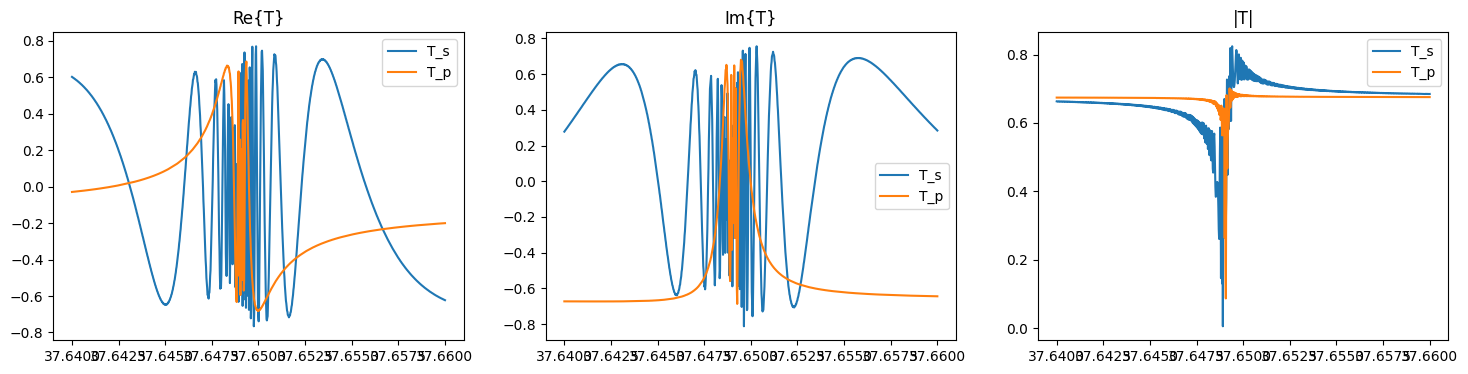

In [13]:
### T ###

#theta = np.linspace(37.645,37.655, 500)
theta = np.linspace(37.64,37.66, 1000)


fig, axs = plt.subplots(1,3, figsize=(18,4))
axs[0].plot(theta,calculate_sigma(E0, t, theta)[8].real,label="T_s")
axs[0].plot(theta,calculate_pi(E0, t, theta)[8].real,label="T_p")
axs[0].set_title("Re{T}")
axs[0].legend()

axs[1].plot(theta,calculate_sigma(E0, t, theta)[8].imag,label="T_s")
axs[1].plot(theta,calculate_pi(E0, t, theta)[8].imag,label="T_p")
axs[1].set_title("Im{T}")
axs[1].legend()

axs[2].plot(theta,np.abs(calculate_sigma(E0, t, theta)[8]),label="T_s")
axs[2].plot(theta,np.abs(calculate_pi(E0, t, theta)[8]),label="T_p")
axs[2].set_title("|T|")
axs[2].legend()

plt.show()

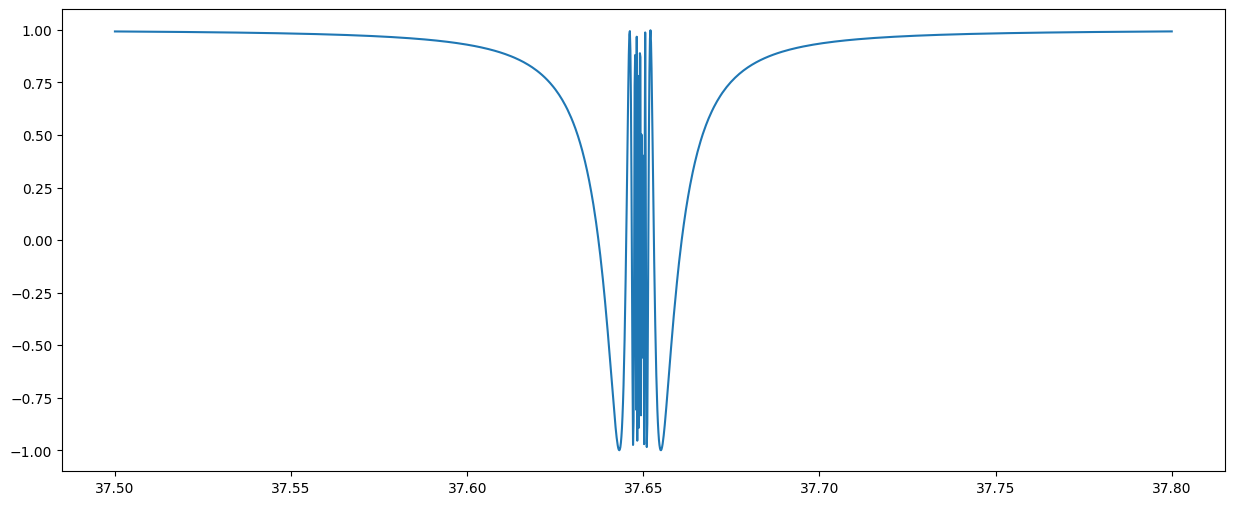

In [14]:
### Degree of polarisation without averaging ###

#theta = np.linspace(37.6,37.7, 500)
theta = np.linspace(37.5,37.8, 2000)

plt.figure(figsize=(15, 6), dpi=100)


plt.plot(theta, (np.abs(calculate_sigma(E0, t, theta)[-1]+calculate_pi(E0, t, theta)[-1])**2
                  - np.abs(calculate_sigma(E0, t, theta)[-1]-calculate_pi(E0, t, theta)[-1])**2) /
                (np.abs(calculate_sigma(E0, t, theta)[-1]+calculate_pi(E0, t, theta)[-1])**2
                  + np.abs(calculate_sigma(E0, t, theta)[-1]-calculate_pi(E0, t, theta)[-1])**2))
#plt.plot(theta, np.cos(np.angle(calculate_sigma(E0, t, theta)[-1])-np.angle(calculate_pi(E0, t, theta)[-1])))

plt.show()